In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

dataframe = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv',low_memory=False)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

# 1. Comparación por marca

In [3]:
dataframe['marca'], dataframe['modelo'] = dataframe['model'].str.split(' ',1).str
dataframe['marca'] = dataframe['marca'].apply(lambda marca: 'Apple' if (marca == 'iPhone' or marca == 'iPad') else marca)

prod1=dataframe[dataframe['event'] == 'conversion']
conversion = prod1['marca'].value_counts()

prod2=dataframe[dataframe['event'] == 'checkout']
checkout = prod2['marca'].value_counts()

In [4]:
tabla1 = pd.concat([conversion],axis=1)
tabla1.columns = ['conversion']
tabla1['conversion_log'] = np.log(tabla1["conversion"]+1)

tabla2 = pd.concat([checkout],axis=1)
tabla2.columns = ['checkout']
tabla2['checkout_log'] = np.log(tabla2["checkout"]+1)

tabla = pd.concat([tabla2['checkout_log'],tabla1['conversion_log']],axis=1)
tabla

,checkout_log,conversion_log
Apple,9.56,5.78
Asus,4.16,1.10
LG,6.33,3.04
Lenovo,5.61,2.71
Motorola,8.23,5.01
Quantum,3.00,nan
Samsung,9.60,6.46
Sony,5.39,3.18


Text(0.5,0,'Marca')

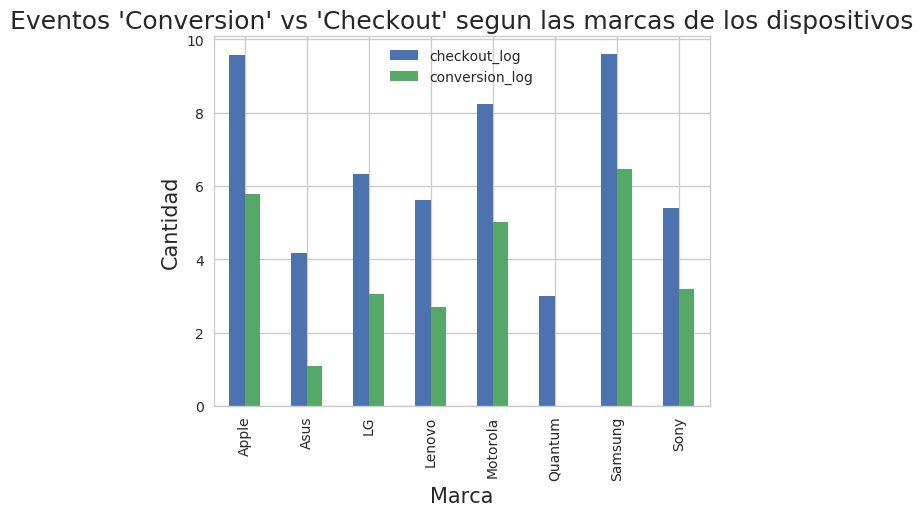

In [5]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''
g = tabla.plot.bar()
g.set_title("Eventos 'Conversion' vs 'Checkout' segun las marcas de los dispositivos", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Marca", fontsize=15)

Como se puede observar en el gráfico, el usuario realiza muchos más checkouts que conversiones. Las dos marcas que lideran esta tabla son las dos marcas líderes del mercado como Apple y Samsung seguidos de cerca por Motorola. Puede observarse ademas que los registros de checkout son proporcionales a los de conversión.

In [6]:
conversion

Samsung     641
Apple       323
Motorola    149
Sony         23
LG           20
Lenovo       14
Asus          2
Name: marca, dtype: int64

Text(0,0.5,'Marca')

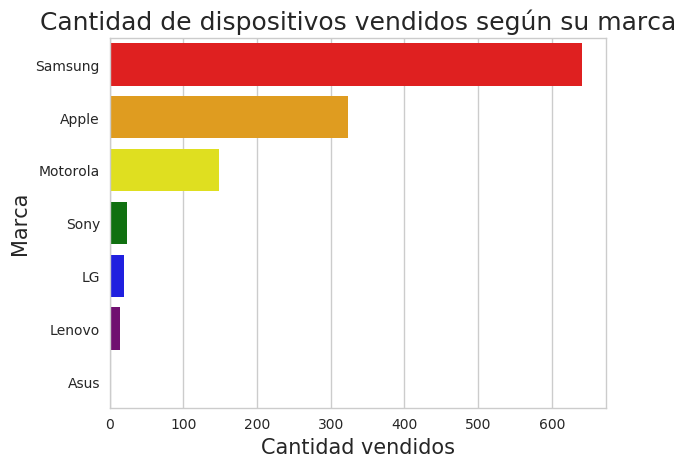

In [7]:
'''
Grafico de barras de ventas por marca de dispositivo.
'''

g = sns.barplot(x=conversion.values, y=conversion.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de dispositivos vendidos según su marca", fontsize=18)
g.set_xlabel("Cantidad vendidos", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

Se observa en el gráfico que los dispositivos de marca Samsung son los más vendidos junto con los Apple y los Motorola, habiendo mucha diferencia con el siguiente que es Sony. La amplia diferencia que hay entre Samsung y Apple puede ser por la alta cantidad de modelos de celulares activos que tiene en el mercado.

In [8]:
SamsungVendidos = prod1.loc[prod1.marca == 'Samsung',:]['modelo'].value_counts().head(20)
SamsungVendidos

Galaxy J5                    88
Galaxy S6 Flat               39
Galaxy J7                    28
Galaxy A5                    27
Galaxy Gran Prime Duos TV    24
Galaxy J7 Prime              20
Galaxy Note 4                19
Galaxy Gran Prime 3G Duos    18
Galaxy S7                    18
Galaxy S5                    18
Galaxy S7 Edge               17
Galaxy S3 Mini               17
Galaxy S5 Mini Duos          16
Galaxy S6 Edge               16
Galaxy Win Duos              16
Galaxy S8                    15
Galaxy A5 2017               13
Galaxy Core 2 Duos           13
Galaxy J2 Prime TV           13
Galaxy A5 2016               13
Name: modelo, dtype: int64

Text(0.5,0,'Modelo')

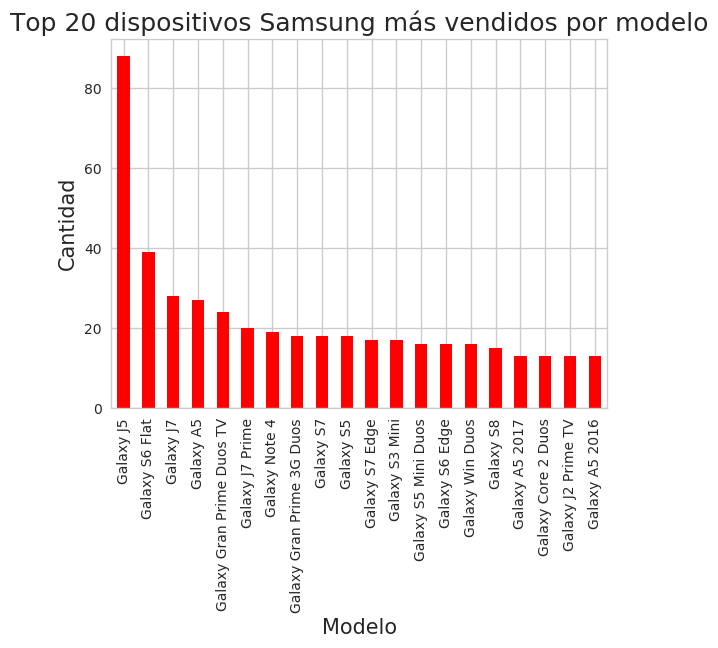

In [9]:
'''
Grafico de barras de top 20 dispositivos Samsung mas vendidos.
'''
g = SamsungVendidos.plot.bar(color=['red'])
g.set_title("Top 20 dispositivos Samsung más vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

Se ve que los celulares Samsung mas vendidos no son los mas nuevos, sino que son celulares que fueron lanzados al mercado hace 3 años aproximadamente. Esto demuestra que los usuarios tienen tendencias a comprar dispositivos que no estan discontinuados pero que por otro lado ya han sido sucedidos por varios modelos nuevos.

In [10]:
AppleVendidos = prod1.loc[prod1.marca == 'Apple',:]['model'].value_counts()
AppleVendidos

iPhone 5s         84
iPhone 6          71
iPhone 6S         37
iPhone 5c         33
iPhone SE         17
iPhone 5          17
iPhone 7          16
iPhone 6S Plus    14
iPhone 4S         10
iPhone 4G          9
iPhone 6 Plus      8
iPhone 7 Plus      6
iPhone 8           1
Name: model, dtype: int64

Text(0.5,0,'Modelo')

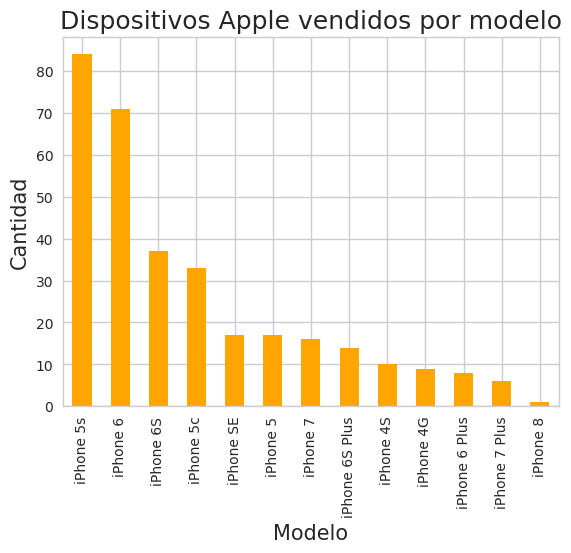

In [11]:
'''
Grafico de barras de dispositivos Apple mas vendidos.
'''
g = AppleVendidos.plot.bar(color=['orange'])
g.set_title("Dispositivos Apple vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

A diferencia de Samsung, aqui se ve que los 2 modelos mas vendidos son modelos que salieron entre 4 y 5 años atras. Esto muestra algo similar a lo sucedido con Samsung, demostrando que los dispositivos de Apple mas nuevos suelen ser muy caros y por lo que la gente que recurre a la pagina esta mas interesada en celulares viejos pero que todavia estan funcionales.

In [12]:
MotorolaVendidos = prod1.loc[prod1.marca == 'Motorola',:]['modelo'].value_counts()
MotorolaVendidos

Moto G4 Plus           30
Moto G3 4G             30
Moto G2 3G Dual        17
Moto X Play 4G Dual    12
Moto G4 Play DTV        7
Moto G5                 7
Moto G4 Play            5
Moto G2 4G Dual         5
Moto X2                 5
Moto MAXX               4
Moto E2 3G Dual         4
Moto E2 4G Dual         4
Moto G4 DTV             4
Moto G5 Plus            3
Moto Z Play             3
Moto X Style            2
Moto G3 HDTV            2
Moto Z                  2
Moto G5S Plus           1
Moto X Force            1
Moto Z2 Play            1
Name: modelo, dtype: int64

Text(0.5,0,'Modelo')

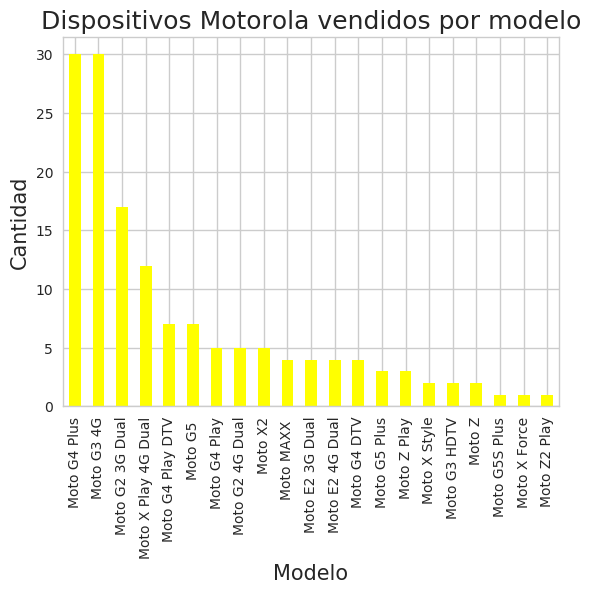

In [13]:
'''
Grafico de barras de dispositivos Motorola mas vendidos.
'''
g = MotorolaVendidos.plot.bar(color=['yellow'])
g.set_title("Dispositivos Motorola vendidos por modelo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Modelo", fontsize=15)

In [14]:
#Registros para aviso de stock por marca y modelo
leads=dataframe.groupby('event')
leads=leads.get_group('lead').groupby(['marca','model'])['event'].count().to_frame()

leads['cantidad de leads']=leads['event']
leads['cantidad de leads'].to_frame()

cantidad de leads
marca      model                                                 
Apple      iPad Air Wi-Fi + 4G                                  2
           iPad Mini Wi-Fi + 4G                                 1
           iPhone 4G                                            3
           iPhone 4S                                            2
           iPhone 5                                             3
           iPhone 5c                                            4
           iPhone 5s                                            5
           iPhone 6                                            12
           iPhone 6 Plus                                       35
           iPhone 6S                                           21
           iPhone 6S Plus                                      31
           iPhone 7                                             5
           iPhone 7 Plus                                        9
           iPhone 8                                            20
           iPhone 8 Plus                                        7
           iPhone SE                                            5
           iPhone X                                             4
Asus       Asus Zenfone 3 Max 16 GB                             3
Blackberry Blackberry Blackberry Z30                            1
LG         LG  X Screen                                         1
           LG G3 Stylus D690                                    1
           LG G4 H815P                                          1
           LG G4 H818P                                          2
           LG G4 Stylus H630                                    3
           LG G5 SE                                             2
           LG K10                                               4
           LG K10 Novo                                         12
           LG K10 TV                                            6
           LG K4                                                5
           LG Prime Plus H522                                   2
...                                                           ...
Samsung    Samsung Galaxy J2 4G Duos TV                         2
           Samsung Galaxy J2 Prime TV                           2
           Samsung Galaxy J3                                    1
           Samsung Galaxy J5                                    2
           Samsung Galaxy J5 2016 Metal                         1
           Samsung Galaxy J5 PRO                                3
           Samsung Galaxy J5 Prime                              4
           Samsung Galaxy J7                                    2
           Samsung Galaxy J7 2016 Metal                         1
           Samsung Galaxy J7 PRO                                8
           Samsung Galaxy J7 Prime                             26
           Samsung Galaxy Note 4                                1
           Samsung Galaxy Note 5                                5
           Samsung Galaxy Note 8                                2
           Samsung Galaxy Note Edge                             1
           Samsung Galaxy On 7                                 15
           Samsung Galaxy S3 Mini                               1
           Samsung Galaxy S3 Slim Duos                          1
           Samsung Galaxy S5 Mini Duos                          1
           Samsung Galaxy S6 Edge                               3
           Samsung Galaxy S6 Flat                               1
           Samsung Galaxy S7 Edge                               4
           Samsung Galaxy S8                                    2
           Samsung Galaxy S8 Plus                               2
           Samsung Galaxy Tab E 9.6 Wi-Fi                       2
           Samsung Galaxy Tab E 9.6 Wi-Fi + 3G                  1
           Samsung Galaxy Win 2 Duos TV                         1
           Samsung Galaxy Y Duos                                2
Sony       Sony Xperia

In [15]:
#Mayores cantidades de registro de aviso de disponibilidad de stock por marca
max_leads=leads.groupby('marca').agg({'cantidad de leads':'max'})
max_leads

,cantidad de leads
marca,
Apple,35
Asus,3
Blackberry,1
LG,12
Lenovo,7
Motorola,20
Quantum,3
Samsung,26
Sony,1


In [16]:
#Modelo Apple con mas leads
leads
leads = leads.reset_index()
leads.loc[(leads['marca']=='Apple')&(leads['cantidad de leads']==35),:]

,marca,model,event,cantidad de leads
8,Apple,iPhone 6 Plus,35,35


In [17]:
#Modelo Samsung con mas leads
leads.loc[(leads['marca']=='Samsung')&(leads['cantidad de leads']==26),:]

,marca,model,event,cantidad de leads
75,Samsung,Samsung Galaxy J7 Prime,26,26


In [18]:
#Modelo Motorola con mas leads
leads.loc[(leads['marca']=='Motorola')&(leads['cantidad de leads']==20),:]

,marca,model,event,cantidad de leads
38,Motorola,Motorola Moto G4 Plus,20,20


# 2. Comparación por fecha

In [19]:
'''
Agrego las columnas año, mes y dia.
'''
dataframe['año'],dataframe['mes'],dataframe['dia']= dataframe['timestamp'].str.split(' ').str[0].str.split('-').str

In [20]:
dataframe['actividad'] = 1
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='actividad', aggfunc='sum')

Text(50.7222,0.5,'Mes')

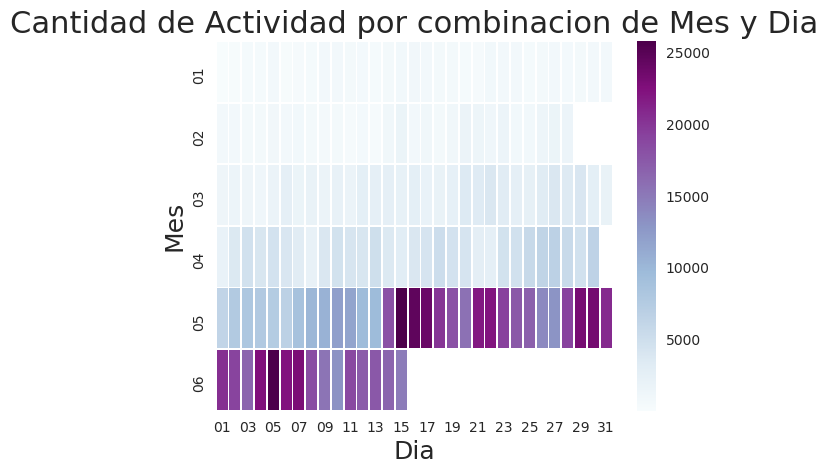

In [21]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de Actividad por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [22]:
dataframe['compra'] = dataframe['event']=='conversion'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='compra', aggfunc='sum')

Text(50.7222,0.5,'Mes')

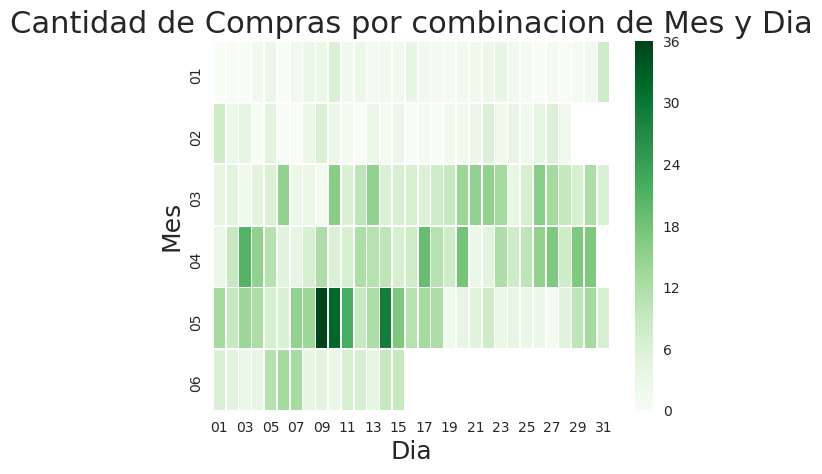

In [23]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Greens") # annot=True
g.set_title("Cantidad de Compras por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

In [24]:
dataframe['checkout'] = dataframe['event']=='checkout'
for_heatmap = dataframe.pivot_table(index='mes', columns='dia', values='checkout', aggfunc='sum')

Text(50.7222,0.5,'Mes')

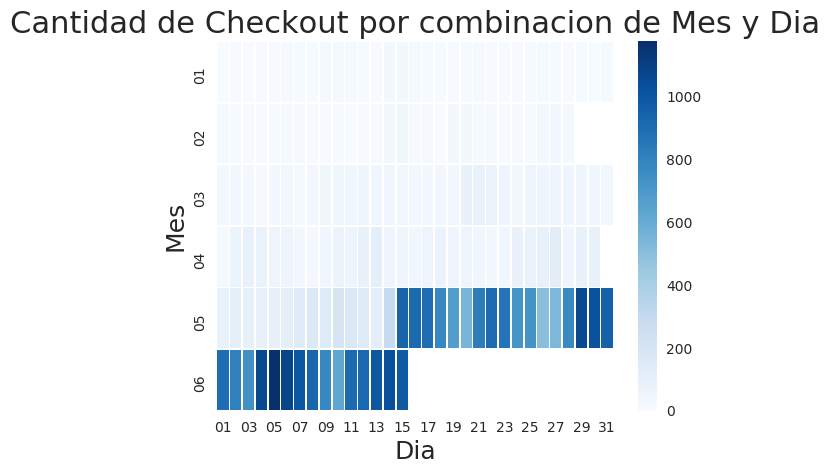

In [25]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="Blues") # annot=True
g.set_title("Cantidad de Checkout por combinacion de Mes y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)

# 3. Comparación por ubicación

In [26]:
dataframe['pais'] = dataframe['country'].dropna().apply(lambda country: 'Other' if (country != 'Brazil') else country)

In [27]:
ingresoPorPais = dataframe.loc[dataframe['event'] == 'visited site'].filter(items = ['pais','event']).groupby('pais').count()
ingresoPorPais = ingresoPorPais.loc[ingresoPorPais['event'] > 10]['event']

In [28]:
dataframe.loc[dataframe['country']!='Brazil',:]['country'].value_counts()

Unknown               2313
United States          465
Argentina               94
Canada                  35
Netherlands             13
France                  13
United Kingdom          12
Mozambique              12
Japan                   11
Poland                   9
French Guiana            8
Portugal                 7
Romania                  7
Italy                    7
Russia                   6
Dominican Republic       6
Guadeloupe               6
Germany                  5
Colombia                 4
Bangladesh               4
Paraguay                 4
Switzerland              3
India                    2
Morocco                  2
Angola                   2
Israel                   1
Uzbekistan               1
Cape Verde               1
Venezuela                1
China                    1
Denmark                  1
Rwanda                   1
Belize                   1
Ireland                  1
Saudi Arabia             1
Algeria                  1
Philippines              1
S

Text(0,0.5,'')

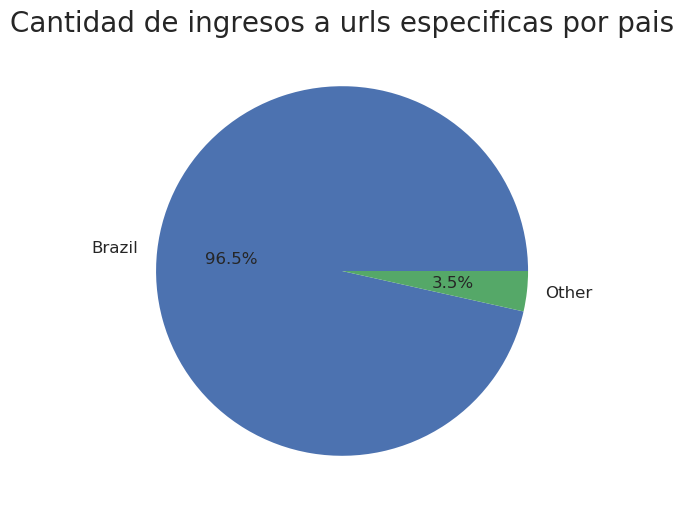

In [29]:
'''
Grafico pie de urls visitadas en la pagina por pais.
'''
g = ingresoPorPais.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),fontsize=12)
g.set_title("Cantidad de ingresos a urls especificas por pais",fontsize=20)
g.set_ylabel("")

Se ve que supera por gran distancia Brasil en cuanto a lo que es visitar la pagina, por lo que se entiende que tiene una gran repercusion local.

In [30]:
ingresoPorRegionEnBrazil = dataframe.filter(items = ['country','region','event']).loc[dataframe['country'] == 'Brazil']['region'].value_counts()
ingresoPorRegionEnBrazil

Sao Paulo              24996
Unknown                12378
Minas Gerais            7755
Rio de Janeiro          6913
Bahia                   5737
Pernambuco              2962
Ceara                   2829
Parana                  2602
Rio Grande do Sul       2576
Federal District        1739
Goias                   1564
Santa Catarina          1511
Para                    1382
Maranhao                1303
Espirito Santo          1257
Rio Grande do Norte     1064
Paraíba                  875
Piaui                    824
Alagoas                  751
Mato Grosso do Sul       618
Amazonas                 600
Tocantins                596
Mato Grosso              487
Sergipe                  405
Rondonia                 273
Amapa                    148
Acre                      96
Roraima                   67
Name: region, dtype: int64

Text(0,0.5,'Region')

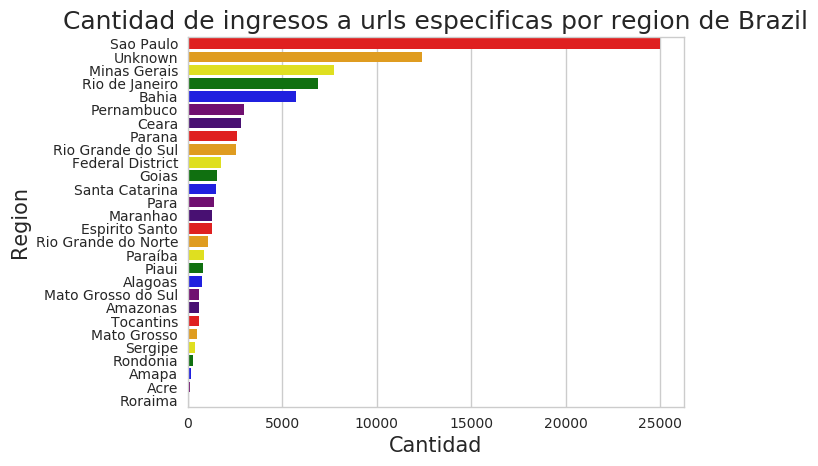

In [31]:
'''
Grafico de barras de cantidad de eventos en la pagina por region en Brazil.
'''
g = sns.barplot(x=ingresoPorRegionEnBrazil.values, y=ingresoPorRegionEnBrazil.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de ingresos a urls especificas por region de Brazil", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Region", fontsize=15)

# 4. Comparación por ad campaign

In [93]:
ingresosPorAd = dataframe.loc[dataframe['event'] == 'ad campaign hit']['campaign_source'].value_counts()
ingresosPorAd

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

In [32]:
ingresosPorAd = dataframe.loc[dataframe['event'] == 'ad campaign hit']['campaign_source'].value_counts()
ingresosPorAd_log= np.log(ingresosPorAd+1)
ingresosPorAd_log

google                            10.97
criteo                             9.18
rtbhouse                           9.05
zanox                              7.42
emblue                             7.21
FacebookAds                        6.64
afilio                             6.54
bing                               6.18
voxus                              6.07
rakuten                            5.74
indexa                             5.04
buscape                            4.96
manifest                           4.84
Facebook                           4.36
datacrush                          4.11
blog                               3.64
afiliado                           3.56
yotpo                              3.26
mercadopago                        2.94
FacebookSocial                     2.20
MARKETING SOCIAL                   2.08
onsite                             1.39
socialmedia                        0.69
Google Social                      0.69
Name: campaign_source, dtype: float64

Text(0,0.5,'Ad')

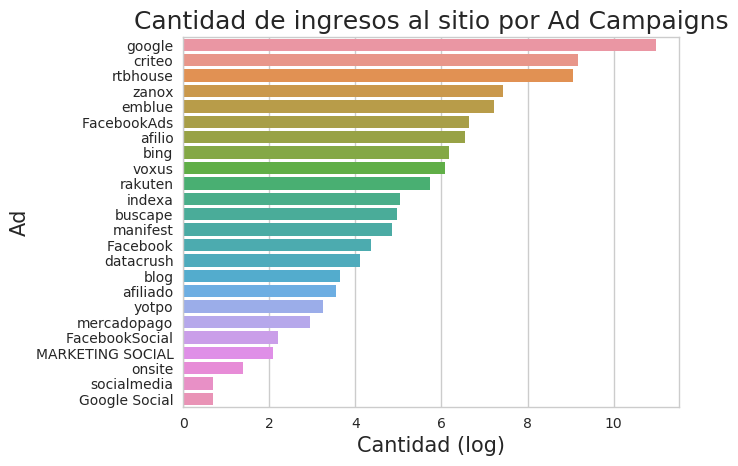

In [33]:
'''
Grafico de barras de la cantidad de ingresos al sitio por Ad Campaigns.
'''
g = sns.barplot(x=ingresosPorAd_log.values, y=ingresosPorAd.index, orient='h')
g.set_title("Cantidad de ingresos al sitio por Ad Campaigns", fontsize=18)
g.set_xlabel("Cantidad (log)", fontsize=15)
g.set_ylabel("Ad", fontsize=15)

In [7]:
ingresosCompraPorAdDeGoogle = dataframe.loc[dataframe['campaign_source'] == 'google']['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'comprar') else None).value_counts()
ingresosCompraPorAdDeGoogle

samsung     15723
iphone      14183
motorola     3344
lg            630
sony          210
asus          119
lenovo         82
ipad           62
apple           8
quantum         2
Name: url, dtype: int64

Text(0,0.5,'Marca')

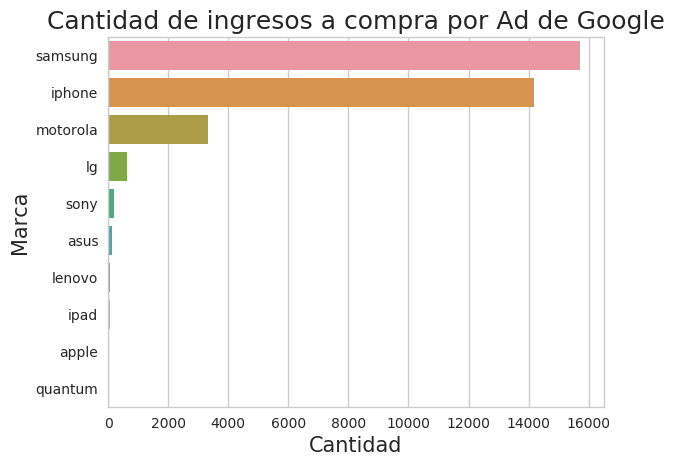

In [35]:
'''
Grafico de barras de la cantidad de ingresos a compra por Ad Campaigns de Google.
'''
g = sns.barplot(x=ingresosCompraPorAdDeGoogle.values, y=ingresosCompraPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a compra por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [3]:
dataframe = dataframe[dataframe.url != '/vender/']
ing = dataframe[dataframe['campaign_source'] == 'google']
ingresosVentaPorAdDeGoogle = ing['url'].dropna().apply(lambda url: (str(url).split('/')[2]) if (str(url).split('/')[1] == 'vender' and len(str(url).split('/'))>=3) else None).value_counts()
ingresosVentaPorAdDeGoogle

motorola    44
lg          26
samsung     11
Name: url, dtype: int64

In [10]:
print('Total de ingresos a venta: '+ str(ingresosVentaPorAdDeGoogle.sum()))
print('Total de ingresos a compra: '+str(ingresosCompraPorAdDeGoogle.sum()))

Total de ingresos a venta: 81
Total de ingresos a compra: 34363


Text(0,0.5,'Marca')

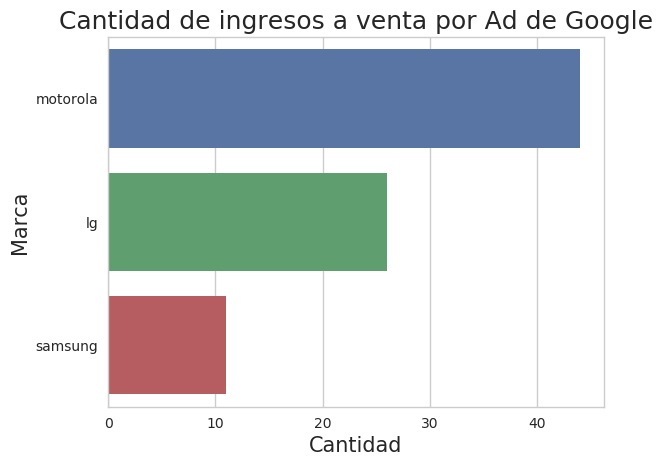

In [107]:
'''
Grafico de barras de la cantidad de ingresos a venta por Ad Campaigns de Google.
'''
g = sns.barplot(x=ingresosVentaPorAdDeGoogle.values, y=ingresosVentaPorAdDeGoogle.index, orient='h')
g.set_title("Cantidad de ingresos a venta por Ad de Google", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [38]:
dataframe.groupby('new_vs_returning')['event'].value_counts()

new_vs_returning  event       
New               visited site    26898
Returning         visited site    60480
Name: event, dtype: int64

# 5. Clasificacion de celulares por apariencia

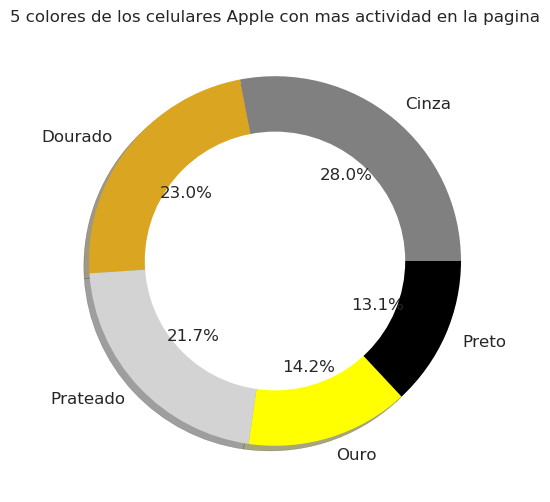

In [39]:
'''
Devuelven listas con los colores mas comprados por marca.
'''

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Samsung'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresSamsung = dataframe['color general'].value_counts().head(5)

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Apple'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresApple = dataframe['color general'].value_counts().head(5)

dataframe['color general'] = dataframe['color'].loc[dataframe['marca'] == 'Motorola'].dropna().apply(lambda a: str(a).split(' ')[0])
top5ColoresMotorola = dataframe['color general'].value_counts().head(5)

g1 = top5ColoresApple.plot(kind='pie',colors=['grey','goldenrod','lightgrey','yellow','black'],labels=top5ColoresApple.index,shadow=True,autopct='%1.1f%%',figsize=(6,6),fontsize=12)
plt.title('5 colores de los celulares Apple con mas actividad en la pagina')
g1.set_ylabel("")
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

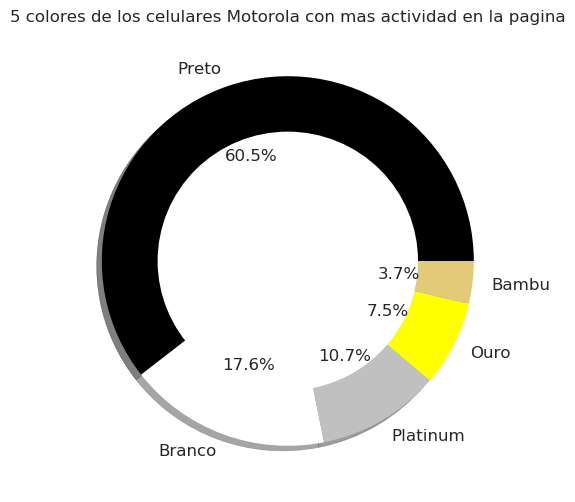

In [40]:
g1 = top5ColoresMotorola.plot(kind='pie',colors=['black','white','silver','yellow','xkcd:sand'],labels=top5ColoresMotorola.index,shadow=True,autopct='%1.1f%%',figsize=(6,6),fontsize=12)
plt.title('5 colores de los celulares Motorola con mas actividad en la pagina')
g1.set_ylabel("")
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

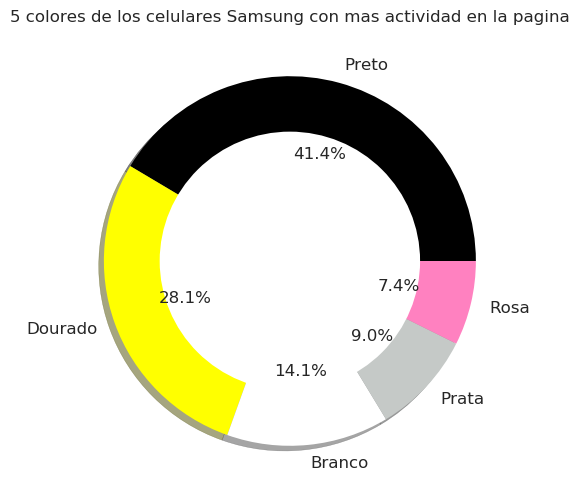

In [41]:
g1 = top5ColoresSamsung.plot(kind='pie',colors=['black','yellow','white','xkcd:silver','xkcd:pink'],labels=top5ColoresSamsung.index,shadow=True,autopct='%1.1f%%',figsize=(6,6),fontsize=12)
plt.title('5 colores de los celulares Samsung con mas actividad en la pagina')
g1.set_ylabel("")
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [42]:
#color mas vendido
coloresVendidos=dataframe[dataframe['event']=='conversion'].loc[:,'color'].value_counts()
coloresVendidos

Preto              368
Dourado            269
Branco             216
Cinza espacial      89
Prateado            51
Ouro Rosa           32
Rosa                30
Cinza               23
Azul                22
Preto Vermelho      11
Prata                8
Platinum             7
Preto Matte          6
Branco Vermelho      6
Verde                5
Titânio              4
Ametista             4
Ouro                 4
Indigo               3
Preto Brilhante      3
Vermelho             2
Cabernet             2
Bambu                2
Amarelo              2
Azul Topázio         1
Preto Azul           1
Couro Vintage        1
Name: color, dtype: int64

In [43]:
color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Samsung')&(dataframe['event']=='conversion'),:]
color_preto_sam=len(color_preto)
color_preto_sam

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Motorola')&(dataframe['event']=='conversion'),:]
color_preto_moto=len(color_preto)
color_preto_moto

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] == 'Apple')&(dataframe['event']=='conversion'),:]
color_preto_app=len(color_preto)
color_preto_app

color_preto = dataframe[dataframe['color']=='Preto'].loc[(dataframe['marca'] != 'Apple')& (dataframe['marca'] != 'Samsung')&(dataframe['marca'] != 'Motorola')&(dataframe['event']=='conversion'),:]
color_preto_others=len(color_preto)
color_preto_others

cantidadPorModelo=[color_preto_app,color_preto_moto,color_preto_sam,color_preto_others]
cantidadPorModeloIndex=['Apple','Motorola','Samsung','Otros']

Text(0,0.5,'Cantidad')

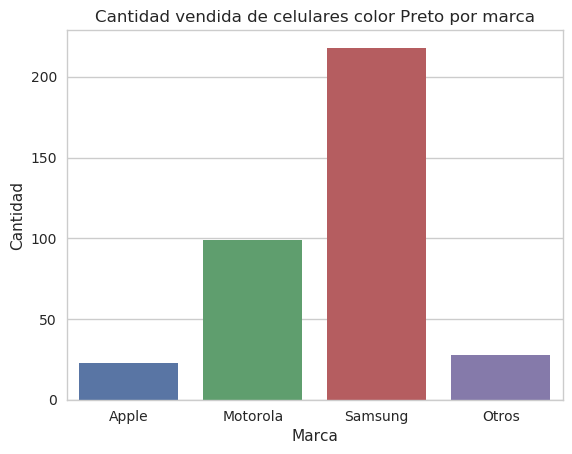

In [44]:
g=sns.barplot(x=cantidadPorModeloIndex,y=cantidadPorModelo)
g.set_title('Cantidad vendida de celulares color Preto por marca')
g.set_xlabel('Marca')
g.set_ylabel('Cantidad')

Text(0.5,1,'Cantidad de conversiones con respecto a la condicion del producto')

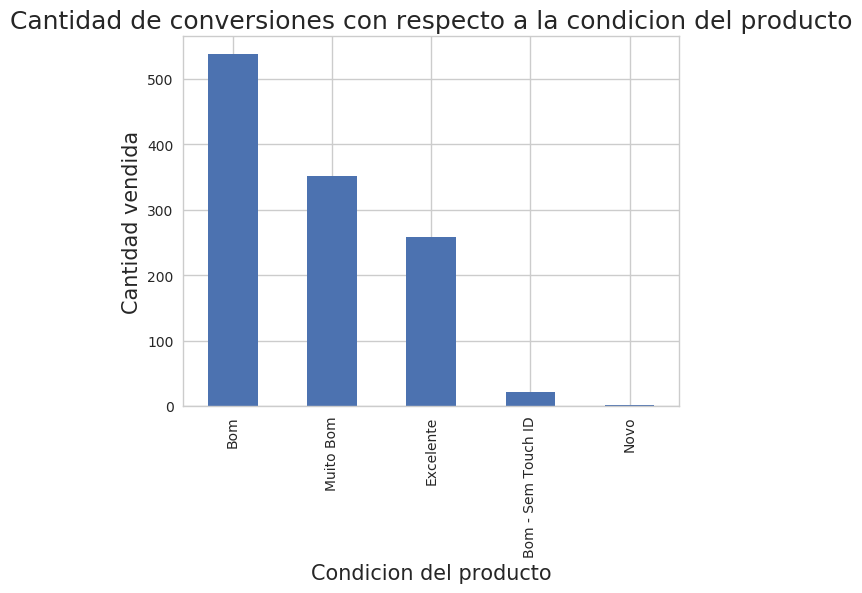

In [45]:
conversiones=dataframe[dataframe['event'] == 'conversion']
condicionDeConversiones=conversiones['condition'].value_counts()
g=condicionDeConversiones.plot.bar()
g.set_xlabel('Condicion del producto',fontsize=15)
g.set_ylabel('Cantidad vendida',fontsize=15)
g.set_title('Cantidad de conversiones con respecto a la condicion del producto', fontsize=18)

In [46]:
#Estudio de ventas con respecto a la condicion del producto
conversiones=dataframe[dataframe['event'] == 'conversion']
condition_per_brand=conversiones.groupby(['marca','condition']).count()
conv=condition_per_brand['event'].to_frame()
conv.columns=['cantidad de conversiones']
conv

cantidad de conversiones
marca    condition                                   
Apple    Bom                                      132
         Bom - Sem Touch ID                        22
         Excelente                                 77
         Muito Bom                                 92
Asus     Bom                                        1
         Excelente                                  1
LG       Bom                                       10
         Excelente                                  6
         Muito Bom                                  4
Lenovo   Bom                                        8
         Excelente                                  6
Motorola Bom                                       61
         Excelente                                 39
         Muito Bom                                 49
Samsung  Bom                                      324
         Excelente                                126
         Muito Bom                                189
         Novo                                       2
Sony     Bom                                        2
         Excelente                                  3
         Muito Bom                                 18

In [47]:
#Reseteo el indice para trabajar mas facil y poder hacer un stack bar plot
conv.reset_index(inplace=True)
conv

,marca,condition,cantidad de conversiones
0,Apple,Bom,132
1,Apple,Bom - Sem Touch ID,22
2,Apple,Excelente,77
3,Apple,Muito Bom,92
4,Asus,Bom,1
5,Asus,Excelente,1
6,LG,Bom,10
7,LG,Excelente,6
8,LG,Muito Bom,4
9,Lenovo,Bom,8


In [48]:
conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'), :]

,marca,condition,cantidad de conversiones
0,Apple,Bom,132
2,Apple,Excelente,77
3,Apple,Muito Bom,92


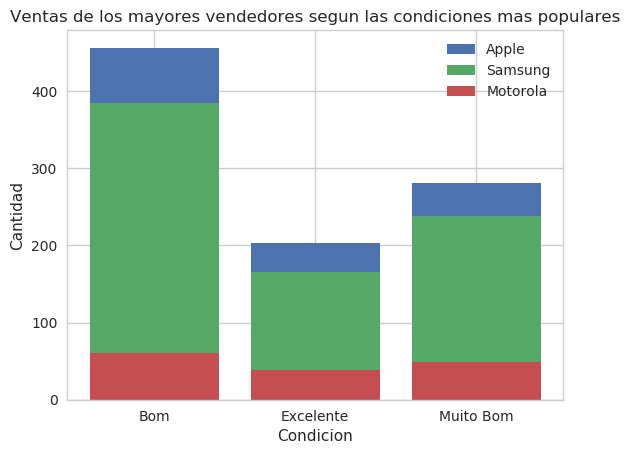

In [98]:
appleVentas=conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'),'cantidad de conversiones'].values
samsungVentas=conv.loc[(conv['marca']=='Samsung') & (conv['condition']!='Novo'),'cantidad de conversiones'].values
motorolaVentas=conv.loc[conv['marca']=='Motorola','cantidad de conversiones'].values

g1=plt.bar(x=conv.loc[(conv['marca']=='Apple') & (conv['condition']!='Bom - Sem Touch ID'), 'condition'],height=appleVentas, bottom=samsungVentas)
g2=plt.bar(x=conv.loc[(conv['marca']=='Samsung') & (conv['condition']!='Novo'),'condition'],height=samsungVentas,bottom=motorolaVentas)
g3=plt.bar(x=conv.loc[conv['marca']=='Motorola','condition'],height=motorolaVentas)


plt.title('Ventas de los mayores vendedores segun las condiciones mas populares')
plt.xlabel('Condicion')
plt.ylabel('Cantidad')
plt.legend((g1[0],g2[0],g3[0]),('Apple','Samsung','Motorola'))

plt.show()

# 6. Datos por sku

In [50]:
#Estudio del dataframe de acuerdo al identificador unico de cada producto
#Sku con mas conversiones
conv_sku=conversiones.groupby('sku').count()
conv_sku=conv_sku.sort_values('event',ascending=False).loc[:,'event'].to_frame()
conv_sku.columns=['cantidad de conversiones']
conv_sku.head(15)

,cantidad de conversiones
sku,
6371.0,30
6370.0,18
7631.0,17
2692.0,16
3371.0,14
2711.0,12
6343.0,12
283.0,11
6357.0,11


In [51]:
#Producto mas visto por los usuarios
sku_viewed=dataframe[dataframe['event']=='viewed product'].loc[:,'sku'].value_counts().to_frame()
sku_viewed.columns=['cantidad de visitas']
sku_viewed

,cantidad de visitas
2830.0,4007
2829.0,3466
2831.0,3423
8443.0,3265
12758.0,2714
2833.0,2685
9930.0,2415
5907.0,2404
3371.0,2343
2692.0,2235


In [52]:
#todas las URLs visitadas
dataframe['url'].value_counts()

/                                                   28323
/comprar/iphone                                      4132
/comprar/iphone/6s                                   3393
/comprar/iphone/6                                    3228
/comprar/samsung                                     2782
/comprar/iphone/iphone-5s                            2689
/comprar/samsung/galaxy-j5                           2446
/comprar/samsung/galaxy-s7-edge                      1972
/comprar/samsung/galaxy-s8                           1499
/comprar/samsung/galaxy-j7                           1465
/comprar/samsung/galaxy-s6-edge                      1415
/comprar/motorola                                    1154
/comprar/samsung/galaxy-s7                           1139
/comprar/iphone/7                                    1120
/comprar/samsung/galaxy-s6-flat                      1067
/comprar/iphone/iphone-6s-plus                        947
/comprar/samsung/samsung-gran-prime-duos-tv           944
/comprar/samsu

Text(0.5,0,'URLs')

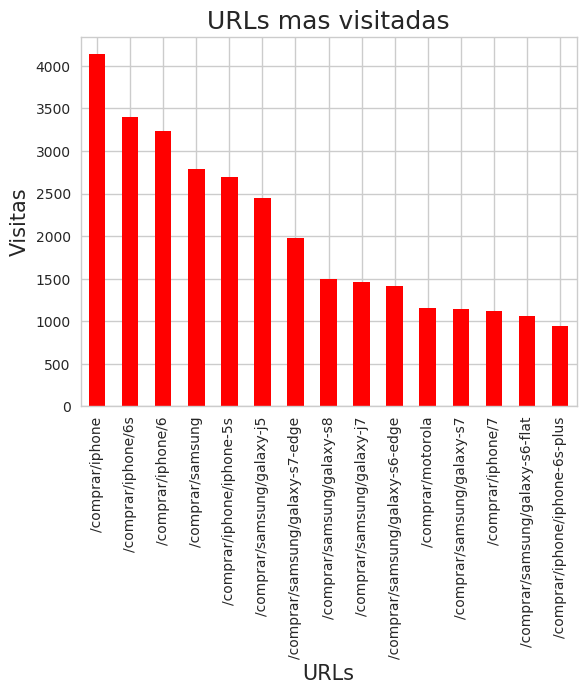

In [53]:
#elimino el "home" ya que la diferencia entre las otras url es muy alta
dataframe = dataframe[dataframe.url != '/']
dataURL = dataframe[(dataframe['event'] == 'ad campaign hit')]
g = dataURL['event'].groupby(dataURL['url']).count().sort_values(ascending = False)[:15].plot.bar(color=['red'])
g.set_title("URLs mas visitadas", fontsize=18)
g.set_ylabel("Visitas", fontsize=15)
g.set_xlabel("URLs", fontsize=15)

In [54]:
#Estudio de checkout/conversion de acuerdo a los usuarios

#Hay muchos mas checkouts que conversiones
ch_con=dataframe.loc[(dataframe['event']=='conversion') | (dataframe['event']=='checkout'),:]
c=ch_con.groupby(['event'])
print('La cantidad de checkout son ' + str(len(c.get_group('checkout'))))
print('La cantidad de conversiones son ' + str(len(c.get_group('conversion'))))

La cantidad de checkout son 33735
La cantidad de conversiones son 1172


In [55]:
ch_con=dataframe.loc[(dataframe['event']=='conversion') | (dataframe['event']=='checkout'),:]
ch_con['search_engine']

3          NaN
7          NaN
44         NaN
85         NaN
86         NaN
94         NaN
95         NaN
103        NaN
110        NaN
114        NaN
137        NaN
204        NaN
216        NaN
219        NaN
220        NaN
225        NaN
226        NaN
233        NaN
257        NaN
271        NaN
299        NaN
326        NaN
334        NaN
361        NaN
366        NaN
367        NaN
386        NaN
390        NaN
480        NaN
489        NaN
          ... 
1010700    NaN
1010722    NaN
1010730    NaN
1010734    NaN
1010763    NaN
1010767    NaN
1010779    NaN
1010787    NaN
1010801    NaN
1010809    NaN
1010838    NaN
1010848    NaN
1010879    NaN
1010887    NaN
1010948    NaN
1010983    NaN
1011010    NaN
1011014    NaN
1011043    NaN
1011052    NaN
1011057    NaN
1011180    NaN
1011186    NaN
1011204    NaN
1011230    NaN
1011234    NaN
1011239    NaN
1011247    NaN
1011283    NaN
1011287    NaN
Name: search_engine, Length: 34907, dtype: object

In [56]:
#Estudio por busquedas
busquedas=dataframe.loc[:,['search_term']].dropna()['search_term'].transform(lambda palabra: palabra.lower()).value_counts()
busquedas

iphone 6                    3347
iphone                      2968
iphone 6s                   2576
iphone 7                    1354
iphone 5s                   1101
j7                           950
motorola                     852
j5                           850
s7                           763
iphone 6 plus                756
s8                           700
iphone se                    661
samsung                      595
iphone 6s plus               592
iphone 5                     577
iphone 7 plus                528
s6                           480
j7 prime                     436
moto g5                      415
lg                           367
moto g                       353
moto g4                      328
s7 edge                      327
a5                           323
moto z                       313
iphone 8                     304
j2                           301
iphone 5c                    299
6s                           279
s5                           276
          

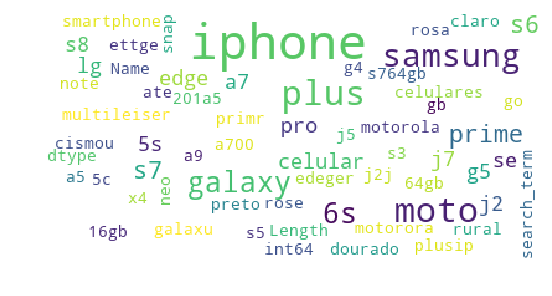

In [57]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(busquedas))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [58]:
import datetime as datetime

In [59]:
personas = dataframe.filter(['timestamp','person','event','device_type'], axis=1)
personas['dia']=pd.to_datetime(personas['timestamp'])
personas['dia']=personas['dia'].dt.day
personas

,timestamp,person,event,device_type,dia
0,2018-05-31 23:38:05,0004b0a2,ad campaign hit,NaN,31
1,2018-05-31 23:38:05,0004b0a2,visited site,Smartphone,31
2,2018-05-31 23:38:09,0004b0a2,viewed product,NaN,31
3,2018-05-31 23:38:40,0004b0a2,checkout,NaN,31
4,2018-05-29 13:29:25,0006a21a,viewed product,NaN,29
5,2018-05-29 13:29:26,0006a21a,visited site,Smartphone,29
6,2018-05-29 13:29:27,0006a21a,ad campaign hit,NaN,29
7,2018-05-29 13:29:35,0006a21a,checkout,NaN,29
8,2018-04-09 20:12:31,000a54b2,generic listing,NaN,9
9,2018-04-09 20:12:31,000a54b2,visited site,Computer,9


In [60]:
#El tipo de dispositivo es indicado solo cuando visita un determinado sitio
personas=personas.loc[(personas['device_type'].isnull()==False)|(personas['event']=='checkout')|(personas['event']=='conversion'),:]
personas

,timestamp,person,event,device_type,dia
1,2018-05-31 23:38:05,0004b0a2,visited site,Smartphone,31
3,2018-05-31 23:38:40,0004b0a2,checkout,NaN,31
5,2018-05-29 13:29:26,0006a21a,visited site,Smartphone,29
7,2018-05-29 13:29:35,0006a21a,checkout,NaN,29
9,2018-04-09 20:12:31,000a54b2,visited site,Computer,9
16,2018-05-24 11:21:07,000a54b2,visited site,Computer,24
44,2018-05-24 11:34:32,000a54b2,checkout,NaN,24
45,2018-04-06 05:12:05,00184bf9,visited site,Computer,6
85,2018-04-06 05:14:58,00184bf9,checkout,NaN,6
86,2018-04-06 05:18:15,00184bf9,checkout,NaN,6


In [61]:
#Ingresan mas personas desde el celular y la computadora que desde otros dispositivos
#Aunque desde el celular ingresan mas que desde la computadora
personas.groupby('device_type').count()

,timestamp,person,event,dia
device_type,,,,
Computer,41790,41790,41790,41790
Smartphone,44239,44239,44239,44239
Tablet,1234,1234,1234,1234
Unknown,115,115,115,115


In [62]:
#Busco en el dataframe los dispositivos usados para entrar a un sitio
df1=personas.loc[personas['device_type'].isnull()==False]
df1

,timestamp,person,event,device_type,dia
1,2018-05-31 23:38:05,0004b0a2,visited site,Smartphone,31
5,2018-05-29 13:29:26,0006a21a,visited site,Smartphone,29
9,2018-04-09 20:12:31,000a54b2,visited site,Computer,9
16,2018-05-24 11:21:07,000a54b2,visited site,Computer,24
45,2018-04-06 05:12:05,00184bf9,visited site,Computer,6
87,2018-05-04 18:47:03,00184bf9,visited site,Computer,4
96,2018-05-17 00:08:56,0019c395,visited site,Smartphone,17
106,2018-06-06 18:40:53,001bb7eb,visited site,Computer,6
108,2018-06-08 12:15:33,001bb7eb,visited site,Computer,8
112,2018-05-29 12:56:08,001f1653,visited site,Smartphone,29


In [63]:
#Busco ahora aquellos eventos de checkout o conversion
df2=personas.loc[(personas['event']=='checkout') |(personas['event']=='conversion')]
df2

,timestamp,person,event,device_type,dia
3,2018-05-31 23:38:40,0004b0a2,checkout,NaN,31
7,2018-05-29 13:29:35,0006a21a,checkout,NaN,29
44,2018-05-24 11:34:32,000a54b2,checkout,NaN,24
85,2018-04-06 05:14:58,00184bf9,checkout,NaN,6
86,2018-04-06 05:18:15,00184bf9,checkout,NaN,6
94,2018-05-04 18:50:21,00184bf9,checkout,NaN,4
95,2018-05-17 04:45:15,00184bf9,checkout,NaN,17
103,2018-05-17 00:11:26,0019c395,checkout,NaN,17
110,2018-06-08 12:19:50,001bb7eb,checkout,NaN,8
114,2018-05-29 12:56:27,001f1653,checkout,NaN,29


In [64]:
#Hago un join por dia y persona para ver los dispositivos que usaron para realizar el checkout o conversion
#El resultado son aquellos registros originados por las mismas personas el mismo dia 
result=pd.merge(df1,df2,on=['dia','person'],how='inner')
result

,timestamp_x,person,event_x,device_type_x,dia,timestamp_y,event_y,device_type_y
0,2018-05-31 23:38:05,0004b0a2,visited site,Smartphone,31,2018-05-31 23:38:40,checkout,NaN
1,2018-05-29 13:29:26,0006a21a,visited site,Smartphone,29,2018-05-29 13:29:35,checkout,NaN
2,2018-05-24 11:21:07,000a54b2,visited site,Computer,24,2018-05-24 11:34:32,checkout,NaN
3,2018-04-06 05:12:05,00184bf9,visited site,Computer,6,2018-04-06 05:14:58,checkout,NaN
4,2018-04-06 05:12:05,00184bf9,visited site,Computer,6,2018-04-06 05:18:15,checkout,NaN
5,2018-05-04 18:47:03,00184bf9,visited site,Computer,4,2018-05-04 18:50:21,checkout,NaN
6,2018-05-17 00:08:56,0019c395,visited site,Smartphone,17,2018-05-17 00:11:26,checkout,NaN
7,2018-06-08 12:15:33,001bb7eb,visited site,Computer,8,2018-06-08 12:19:50,checkout,NaN
8,2018-05-29 12:56:08,001f1653,visited site,Smartphone,29,2018-05-29 12:56:27,checkout,NaN
9,2018-02-01 23:16:05,00204059,visited site,Computer,1,2018-02-01 23:33:52,checkout,NaN


In [65]:
events_per_device=result[['device_type_x','event_y']]
smartphones=events_per_device.loc[events_per_device['device_type_x']=='Smartphone']
computadora=events_per_device.loc[events_per_device['device_type_x']=='Computer']
tablet=events_per_device.loc[events_per_device['device_type_x']=='Tablet']

In [66]:
#Comparacion por dispositivos de checkout/conversion
print('Smartphones')
print(smartphones['event_y'].value_counts())
print('-----------------------------------')
print('Computadoras')
print(computadora['event_y'].value_counts())
print('-----------------------------------')
print('Tablets')
print(tablet['event_y'].value_counts())

Smartphones
checkout      23569
conversion     1360
Name: event_y, dtype: int64
-----------------------------------
Computadoras
checkout      22211
conversion     1307
Name: event_y, dtype: int64
-----------------------------------
Tablets
checkout      687
conversion     10
Name: event_y, dtype: int64


In [67]:
v1=np.log(tablet['event_y'].value_counts()+1)
v2=np.log(smartphones['event_y'].value_counts()+1)
v3=np.log(computadora['event_y'].value_counts()+1)

tabla1 = pd.concat([v1],axis=1)
tabla1.columns = ['Tablet']

tabla2 = pd.concat([v2],axis=1)
tabla2.columns = ['Smartphone']

tabla3 = pd.concat([v3],axis=1)
tabla3.columns = ['Computadora']

tabla = pd.concat([tabla1,tabla2,tabla3],axis=1)
tabla

,Tablet,Smartphone,Computadora
checkout,6.53,10.07,10.01
conversion,2.40,7.22,7.18


Text(0.5,0,'Dispositivo')

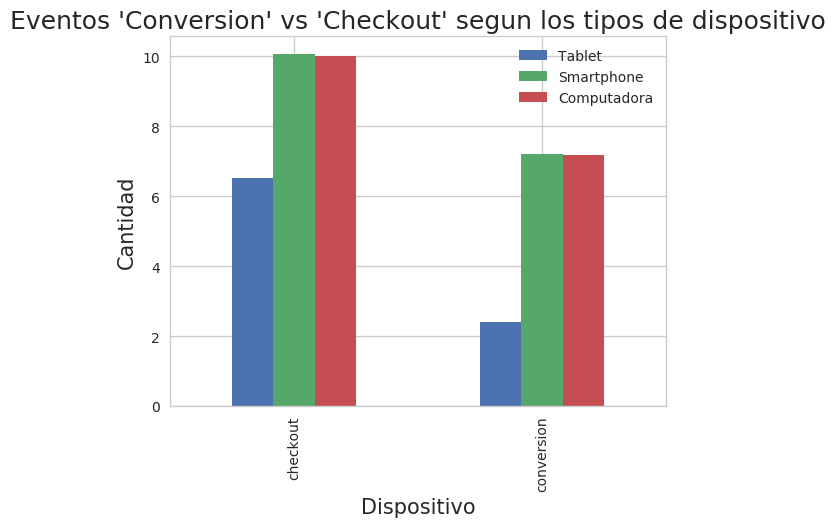

In [68]:
g = tabla.plot.bar()
g.set_title("Eventos 'Conversion' vs 'Checkout' segun los tipos de dispositivo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Dispositivo", fontsize=15)

In [82]:
personas = dataframe.filter(['timestamp','person','event','search_engine'], axis=1)
personas['dia']=pd.to_datetime(personas['timestamp'])
personas['dia']=personas['dia'].dt.day
personas = personas.loc[(personas['search_engine'].isnull()==False)|(personas['event']=='checkout')|(personas['event']=='conversion'),:]

df1=personas.loc[personas['search_engine'].isnull()==False]

df2=personas.loc[(personas['event']=='checkout') |(personas['event']=='conversion')]

result = pd.merge(df1,df2,on=['dia','person'],how='inner')
result

,timestamp_x,person,event_x,search_engine_x,dia,timestamp_y,event_y,search_engine_y
0,2018-05-24 11:21:07,000a54b2,search engine hit,Google,24,2018-05-24 11:34:32,checkout,NaN
1,2018-04-06 05:12:05,00184bf9,search engine hit,Google,6,2018-04-06 05:14:58,checkout,NaN
2,2018-04-06 05:12:05,00184bf9,search engine hit,Google,6,2018-04-06 05:18:15,checkout,NaN
3,2018-04-06 05:12:59,00184bf9,search engine hit,Google,6,2018-04-06 05:14:58,checkout,NaN
4,2018-04-06 05:12:59,00184bf9,search engine hit,Google,6,2018-04-06 05:18:15,checkout,NaN
5,2018-05-17 00:08:56,0019c395,search engine hit,Google,17,2018-05-17 00:11:26,checkout,NaN
6,2018-05-17 00:11:10,0019c395,search engine hit,Google,17,2018-05-17 00:11:26,checkout,NaN
7,2018-06-14 19:23:54,0026fd72,search engine hit,Google,14,2018-06-14 20:30:48,checkout,NaN
8,2018-06-12 21:59:02,0027c344,search engine hit,Google,12,2018-06-12 23:44:34,checkout,NaN
9,2018-06-12 23:40:10,0027c344,search engine hit,Google,12,2018-06-12 23:44:34,checkout,NaN


In [86]:
personas.groupby('search_engine').count()

,timestamp,person,event,dia
search_engine,,,,
Ask,6,6,6,6
Bing,424,424,424,424
Google,50240,50240,50240,50240
Yahoo,287,287,287,287


In [87]:
events_per_search_engine=result[['search_engine_x','event_y']]
google = events_per_search_engine.loc[events_per_search_engine['search_engine_x']=='Google']
bing = events_per_search_engine.loc[events_per_search_engine['search_engine_x']=='Bing']
yahoo = events_per_search_engine.loc[events_per_search_engine['search_engine_x']=='Yahoo']
ask = events_per_search_engine.loc[events_per_search_engine['search_engine_x']=='Ask']

In [88]:
#Comparacion por dispositivos de checkout/conversion
print('Google')
print(google['event_y'].value_counts())
print('-----------------------------------')
print('Bing')
print(bing['event_y'].value_counts())
print('-----------------------------------')
print('Yahoo')
print(yahoo['event_y'].value_counts())
print('-----------------------------------')
print('Ask')
print(ask['event_y'].value_counts())

Google
checkout      30925
conversion     1447
Name: event_y, dtype: int64
-----------------------------------
Bing
checkout      245
conversion     13
Name: event_y, dtype: int64
-----------------------------------
Yahoo
checkout      216
conversion     13
Name: event_y, dtype: int64
-----------------------------------
Ask
checkout    5
Name: event_y, dtype: int64


In [89]:
v1=np.log(google['event_y'].value_counts()+1)
v2=np.log(bing['event_y'].value_counts()+1)
v3=np.log(yahoo['event_y'].value_counts()+1)
v4=np.log(ask['event_y'].value_counts()+1)

tabla1 = pd.concat([v1],axis=1)
tabla1.columns = ['Google']

tabla2 = pd.concat([v2],axis=1)
tabla2.columns = ['Bing']

tabla3 = pd.concat([v3],axis=1)
tabla3.columns = ['Yahoo']

tabla4 = pd.concat([v4],axis=1)
tabla4.columns = ['Ask']

tabla = pd.concat([tabla1,tabla2,tabla3,tabla4],axis=1)
tabla

,Google,Bing,Yahoo,Ask
checkout,10.34,5.51,5.38,1.79
conversion,7.28,2.64,2.64,nan


Text(0.5,0,'Buscadores')

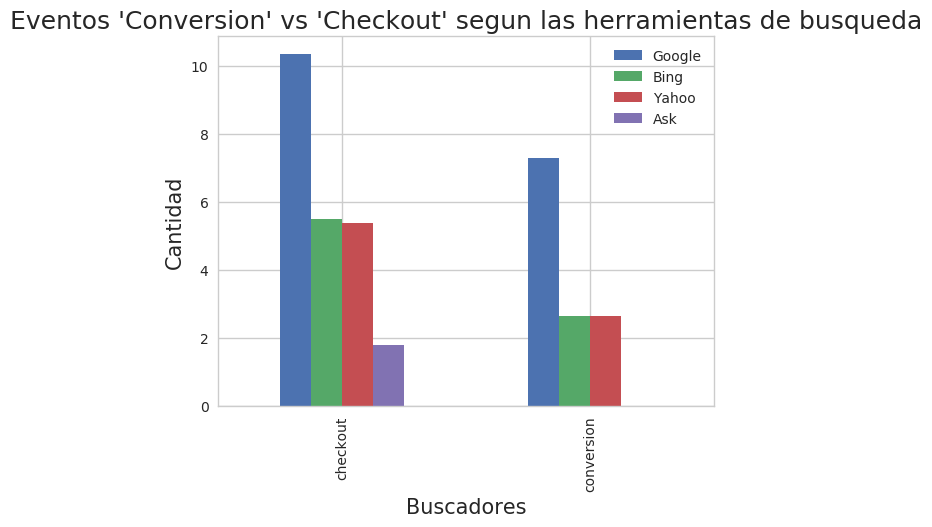

In [90]:
g = tabla.plot.bar()
g.set_title("Eventos 'Conversion' vs 'Checkout' segun las herramientas de busqueda", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Buscadores", fontsize=15)